In [70]:
# !pip install optuna

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

import optuna, pickle, os

# 데이터 로드

In [72]:
import os

colab = os.path.isdir('./sample_data')
mount = os.path.isdir('/content/drive')
if colab:
    if not mount:
        from google.colab import drive
        drive.mount('/content/drive')
    base_path = '/content/drive/MyDrive/Colab Notebooks/5_ML_Project/dulee/'
    data_path = '/content/drive/MyDrive/Colab Notebooks/5_ML_Project/data/'
else:
    base_path = ''
    data_path = '../data/'

In [73]:
submission_df = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

train = pd.read_csv(base_path + 'train.csv', index_col='id')
test = pd.read_csv(base_path + 'test.csv', index_col='id')

##### 변수 설정

In [74]:
X = train.drop(columns=['defects'])
y = train['defects']
X_test = test

# 모델 학습

### Light GBM

In [75]:
os.cpu_count()

2

##### Hyper-parameter Tuning
1. min_child_samples: min_samples_leaf과 비슷
2. colsample_bytree: node split시 동일한 세팅이어야하기에 global randomization을 제공

In [76]:
def optimizer(trial):
    # max_depth = trial.suggest_int('max_depth', 15, 25)
    # num_leaves = trial.suggest_categorical('num_leaves', [4, 8, 16, 32])
    min_child_samples = trial.suggest_int('min_child_samples', 1, 100)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.8)

    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.2)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    # n_estimators = trial.suggest_int('n_estimators', 100, 30000)

    model = LGBMClassifier(
        # max_depth=max_depth,
        num_leaves=4,
        min_child_samples=min_child_samples,
        colsample_bytree=colsample_bytree,

        learning_rate=learning_rate,
        n_estimators=n_estimators,

        class_weight = 'balanced',
        force_col_wise = True,
        random_state = 61,
        n_jobs = os.cpu_count(),
    )

    folds = StratifiedKFold(shuffle=True, random_state=61) # n_splits=5 (default값)
    scores = []
    for train_idx, val_idx in folds.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        y_true = y.iloc[val_idx]
        y_proba = model.predict_proba(X.iloc[val_idx])[:, 1]
        scores.append(roc_auc_score(y_true, y_proba))
    return np.mean(scores)

In [77]:
study = optuna.create_study(direction="maximize")
study.optimize(optimizer, n_trials=50)

[I 2023-10-16 07:44:03,180] A new study created in memory with name: no-name-4b25836f-944e-48cd-ad64-98155f58fc9f


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:44:20,752] Trial 0 finished with value: 0.7917532062303783 and parameters: {'min_child_samples': 48, 'colsample_bytree': 0.5899731609022663, 'learning_rate': 0.14889351828782593, 'n_estimators': 601}. Best is trial 0 with value: 0.7917532062303783.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:44:37,071] Trial 1 finished with value: 0.7898271737937412 and parameters: {'min_child_samples': 40, 'colsample_bytree': 0.5398692227056212, 'learning_rate': 0.009930813325650316, 'n_estimators': 502}. Best is trial 0 with value: 0.7917532062303783.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:45:07,807] Trial 2 finished with value: 0.7920573617760969 and parameters: {'min_child_samples': 48, 'colsample_bytree': 0.7587610480444523, 'learning_rate': 0.07358537971593761, 'n_estimators': 883}. Best is trial 2 with value: 0.7920573617760969.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:45:27,987] Trial 3 finished with value: 0.7916694982334397 and parameters: {'min_child_samples': 10, 'colsample_bytree': 0.6235761824607603, 'learning_rate': 0.09669221853959722, 'n_estimators': 691}. Best is trial 2 with value: 0.7920573617760969.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:45:39,445] Trial 4 finished with value: 0.7918971722585944 and parameters: {'min_child_samples': 50, 'colsample_bytree': 0.6381773425143848, 'learning_rate': 0.17908239473900614, 'n_estimators': 331}. Best is trial 2 with value: 0.7920573617760969.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:45:50,104] Trial 5 finished with value: 0.7923470479167275 and parameters: {'min_child_samples': 15, 'colsample_bytree': 0.5790735986486995, 'learning_rate': 0.1253408474839617, 'n_estimators': 293}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:46:15,898] Trial 6 finished with value: 0.7919609564328505 and parameters: {'min_child_samples': 78, 'colsample_bytree': 0.7803895312471898, 'learning_rate': 0.019473414066724537, 'n_estimators': 746}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:46:37,927] Trial 7 finished with value: 0.7923348964732708 and parameters: {'min_child_samples': 44, 'colsample_bytree': 0.5325565846833532, 'learning_rate': 0.0931926677525437, 'n_estimators': 704}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:46:44,576] Trial 8 finished with value: 0.7920381554881091 and parameters: {'min_child_samples': 49, 'colsample_bytree': 0.6203100763901985, 'learning_rate': 0.17932971638056566, 'n_estimators': 228}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:46:53,710] Trial 9 finished with value: 0.7918192274908546 and parameters: {'min_child_samples': 70, 'colsample_bytree': 0.756990650739547, 'learning_rate': 0.07099294392880776, 'n_estimators': 198}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:47:06,944] Trial 10 finished with value: 0.7912396121726619 and parameters: {'min_child_samples': 3, 'colsample_bytree': 0.6929873177619347, 'learning_rate': 0.1484602501475035, 'n_estimators': 390}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:47:35,059] Trial 11 finished with value: 0.7911558623038749 and parameters: {'min_child_samples': 27, 'colsample_bytree': 0.5294497805902402, 'learning_rate': 0.11965113828428796, 'n_estimators': 976}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:47:41,478] Trial 12 finished with value: 0.7915975383107066 and parameters: {'min_child_samples': 95, 'colsample_bytree': 0.5121886723949292, 'learning_rate': 0.11603871735971062, 'n_estimators': 110}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:47:54,575] Trial 13 finished with value: 0.7920403602386916 and parameters: {'min_child_samples': 21, 'colsample_bytree': 0.5657154538303403, 'learning_rate': 0.0638347246967815, 'n_estimators': 395}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:48:10,591] Trial 14 finished with value: 0.7920324666210636 and parameters: {'min_child_samples': 29, 'colsample_bytree': 0.5009794398655217, 'learning_rate': 0.14082422250526666, 'n_estimators': 554}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:48:34,402] Trial 15 finished with value: 0.7922236159112848 and parameters: {'min_child_samples': 69, 'colsample_bytree': 0.5685610466446664, 'learning_rate': 0.09303846083573497, 'n_estimators': 771}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:48:49,496] Trial 16 finished with value: 0.7918806478059705 and parameters: {'min_child_samples': 19, 'colsample_bytree': 0.5519300946257825, 'learning_rate': 0.036585597896375374, 'n_estimators': 467}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:49:07,553] Trial 17 finished with value: 0.7921246149203925 and parameters: {'min_child_samples': 35, 'colsample_bytree': 0.5817621326693658, 'learning_rate': 0.12001704781836853, 'n_estimators': 631}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:49:32,414] Trial 18 finished with value: 0.7916401955118647 and parameters: {'min_child_samples': 10, 'colsample_bytree': 0.5992910728014418, 'learning_rate': 0.08867229139243922, 'n_estimators': 809}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:49:42,934] Trial 19 finished with value: 0.7917712604157863 and parameters: {'min_child_samples': 65, 'colsample_bytree': 0.5349052334411687, 'learning_rate': 0.05017676491275166, 'n_estimators': 287}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:50:10,213] Trial 20 finished with value: 0.7900407971316451 and parameters: {'min_child_samples': 59, 'colsample_bytree': 0.6619286432750205, 'learning_rate': 0.19771858955504262, 'n_estimators': 890}. Best is trial 5 with value: 0.7923470479167275.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:50:33,164] Trial 21 finished with value: 0.7923833777959948 and parameters: {'min_child_samples': 82, 'colsample_bytree': 0.5639566989023826, 'learning_rate': 0.08767642457201968, 'n_estimators': 724}. Best is trial 21 with value: 0.7923833777959948.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:50:52,197] Trial 22 finished with value: 0.7924855964182932 and parameters: {'min_child_samples': 90, 'colsample_bytree': 0.5537184846362803, 'learning_rate': 0.08368447234243784, 'n_estimators': 663}. Best is trial 22 with value: 0.7924855964182932.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:51:12,515] Trial 23 finished with value: 0.7924171854469673 and parameters: {'min_child_samples': 94, 'colsample_bytree': 0.5652054506981224, 'learning_rate': 0.07810336540543204, 'n_estimators': 601}. Best is trial 22 with value: 0.7924855964182932.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:51:31,183] Trial 24 finished with value: 0.7926059218006986 and parameters: {'min_child_samples': 100, 'colsample_bytree': 0.5553282398608536, 'learning_rate': 0.07756847963874414, 'n_estimators': 638}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:51:52,741] Trial 25 finished with value: 0.7925436828682967 and parameters: {'min_child_samples': 100, 'colsample_bytree': 0.5146796389468903, 'learning_rate': 0.0544207682427563, 'n_estimators': 654}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:52:14,536] Trial 26 finished with value: 0.7924534217650957 and parameters: {'min_child_samples': 100, 'colsample_bytree': 0.500131097892072, 'learning_rate': 0.05532785685011006, 'n_estimators': 659}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:52:34,742] Trial 27 finished with value: 0.7921303169423981 and parameters: {'min_child_samples': 87, 'colsample_bytree': 0.5181647628994869, 'learning_rate': 0.041291346384648556, 'n_estimators': 528}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:53:00,363] Trial 28 finished with value: 0.7924273332444436 and parameters: {'min_child_samples': 88, 'colsample_bytree': 0.5459117771815707, 'learning_rate': 0.06302790958642512, 'n_estimators': 816}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:53:21,646] Trial 29 finished with value: 0.7923166613332546 and parameters: {'min_child_samples': 100, 'colsample_bytree': 0.6050129858715854, 'learning_rate': 0.10673141423997093, 'n_estimators': 609}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:53:36,205] Trial 30 finished with value: 0.7923954945445575 and parameters: {'min_child_samples': 78, 'colsample_bytree': 0.522044894035262, 'learning_rate': 0.08008072036100497, 'n_estimators': 449}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:53:55,659] Trial 31 finished with value: 0.7924506146146529 and parameters: {'min_child_samples': 100, 'colsample_bytree': 0.510570862456476, 'learning_rate': 0.05903374243533972, 'n_estimators': 655}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:54:15,652] Trial 32 finished with value: 0.7922539932509876 and parameters: {'min_child_samples': 90, 'colsample_bytree': 0.5036235277888838, 'learning_rate': 0.04908386970703778, 'n_estimators': 568}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:54:35,411] Trial 33 finished with value: 0.7919452498386541 and parameters: {'min_child_samples': 95, 'colsample_bytree': 0.5476560396855408, 'learning_rate': 0.025778173927324826, 'n_estimators': 659}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:54:55,475] Trial 34 finished with value: 0.7923875423887203 and parameters: {'min_child_samples': 84, 'colsample_bytree': 0.5004204828904066, 'learning_rate': 0.07696467753886974, 'n_estimators': 496}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:55:18,012] Trial 35 finished with value: 0.7923910110443085 and parameters: {'min_child_samples': 99, 'colsample_bytree': 0.5259173792372535, 'learning_rate': 0.05173878633126025, 'n_estimators': 684}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:55:45,037] Trial 36 finished with value: 0.7923677108313717 and parameters: {'min_child_samples': 92, 'colsample_bytree': 0.5409219459537066, 'learning_rate': 0.06693835465782808, 'n_estimators': 877}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:56:03,882] Trial 37 finished with value: 0.7898671270075133 and parameters: {'min_child_samples': 79, 'colsample_bytree': 0.5865401074727381, 'learning_rate': 0.00791882008233051, 'n_estimators': 579}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:56:28,120] Trial 38 finished with value: 0.7921317011630616 and parameters: {'min_child_samples': 73, 'colsample_bytree': 0.5211991419563834, 'learning_rate': 0.09937450079403022, 'n_estimators': 767}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:56:54,019] Trial 39 finished with value: 0.7922295693201081 and parameters: {'min_child_samples': 55, 'colsample_bytree': 0.5383645194397357, 'learning_rate': 0.0316985023174436, 'n_estimators': 823}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:57:18,057] Trial 40 finished with value: 0.7916706824775674 and parameters: {'min_child_samples': 85, 'colsample_bytree': 0.5540176705568024, 'learning_rate': 0.018848857075828035, 'n_estimators': 705}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:57:36,897] Trial 41 finished with value: 0.7924894813557735 and parameters: {'min_child_samples': 100, 'colsample_bytree': 0.5094880349588371, 'learning_rate': 0.05794544991363676, 'n_estimators': 641}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:57:58,210] Trial 42 finished with value: 0.7924689679515805 and parameters: {'min_child_samples': 95, 'colsample_bytree': 0.5214870699952857, 'learning_rate': 0.05582233093968877, 'n_estimators': 630}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:58:16,303] Trial 43 finished with value: 0.7922052232676658 and parameters: {'min_child_samples': 92, 'colsample_bytree': 0.5271496973414731, 'learning_rate': 0.04351749186222652, 'n_estimators': 611}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:58:39,493] Trial 44 finished with value: 0.7924201979301048 and parameters: {'min_child_samples': 95, 'colsample_bytree': 0.5162543352627272, 'learning_rate': 0.07088530644969292, 'n_estimators': 739}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:58:55,857] Trial 45 finished with value: 0.7923607228161451 and parameters: {'min_child_samples': 89, 'colsample_bytree': 0.5384453876298868, 'learning_rate': 0.058123404268697866, 'n_estimators': 531}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:59:18,482] Trial 46 finished with value: 0.7925502765373367 and parameters: {'min_child_samples': 75, 'colsample_bytree': 0.5536658652162738, 'learning_rate': 0.07167785805632014, 'n_estimators': 691}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 07:59:41,088] Trial 47 finished with value: 0.7922979727639481 and parameters: {'min_child_samples': 74, 'colsample_bytree': 0.5748822856794826, 'learning_rate': 0.08558064839140428, 'n_estimators': 694}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 08:00:06,107] Trial 48 finished with value: 0.7924481435241321 and parameters: {'min_child_samples': 82, 'colsample_bytree': 0.5546291006646499, 'learning_rate': 0.07592701711260737, 'n_estimators': 779}. Best is trial 24 with value: 0.7926059218006986.


[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3551
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM]

[I 2023-10-16 08:00:23,701] Trial 49 finished with value: 0.7924455951391309 and parameters: {'min_child_samples': 64, 'colsample_bytree': 0.5928851357795536, 'learning_rate': 0.06328838777938232, 'n_estimators': 575}. Best is trial 24 with value: 0.7926059218006986.


In [78]:
print(f"Best roc_auc_score: {study.best_value:.5f}")
print("Best params: ", study.best_trial.params)
print(study.trials_dataframe()['duration'].sum())

Best roc_auc_score: 0.79261
Best params:  {'min_child_samples': 100, 'colsample_bytree': 0.5553282398608536, 'learning_rate': 0.07756847963874414, 'n_estimators': 638}
0 days 00:16:20.300264


##### best model

In [79]:
def oof_predict(best_model):
    folds = StratifiedKFold(random_state=61, shuffle=True)
    predicted_probas = []

    for train_idx, val_idx in folds.split(X, y):
        best_model.fit(X.iloc[train_idx], y.iloc[train_idx])
        predicted_probas.append(best_model.predict_proba(X_test)[:, 1])
    return np.mean(predicted_probas, axis=0)

In [80]:
model_best = LGBMClassifier(**study.best_trial.params,
                            random_state=61,
                            n_jobs=-1,
                            force_row_wise=True)
model_best.fit(X, y)
y_proba = model_best.predict_proba(X_test)[:, 1]
y_proba_oof = oof_predict(model_best)

[LightGBM] [Info] Number of positive: 23064, number of negative: 78699
[LightGBM] [Info] Total Bins 3585
[LightGBM] [Info] Number of data points in the train set: 101763, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226644 -> initscore=-1.227357
[LightGBM] [Info] Start training from score -1.227357
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226643 -> initscore=-1.227365
[LightGBM] [Info] Start training from score -1.227365
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226643 -> initscore=-1.227365
[LightGBM] [Info] Start training from score -1.227365
[Li

In [81]:
# save model
pickle.dump(model_best, open(base_path + "lgbm_best.pickle", "wb"))

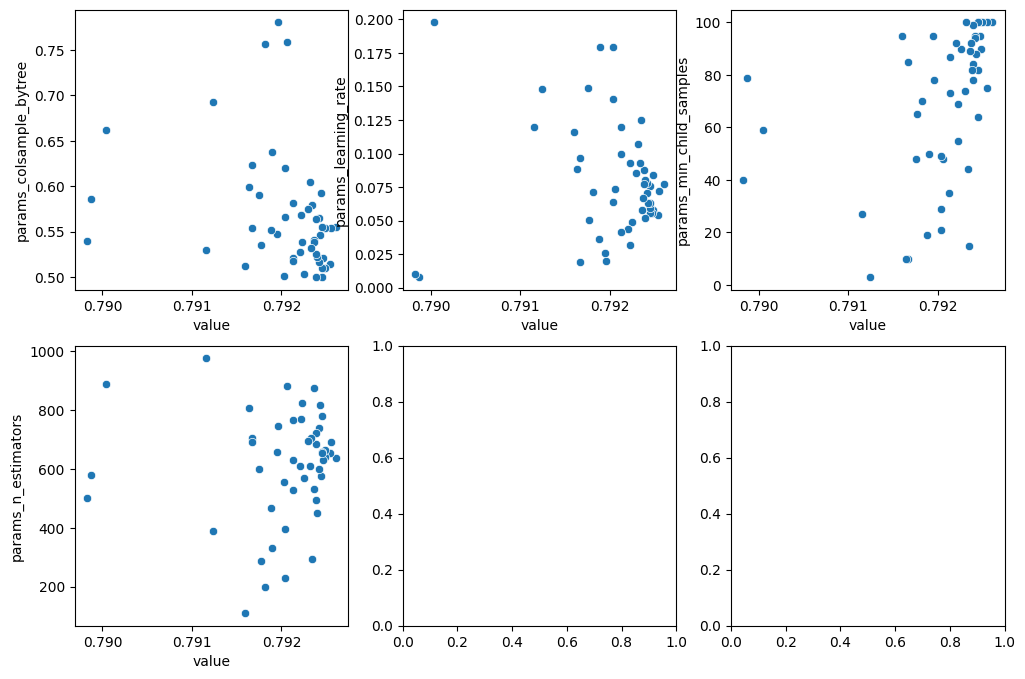

In [82]:
# optuna가 시도했던 모든 실험 관련 데이터
param_analysis = study.trials_dataframe().sort_values(by=['value'], ascending=False)
param_analysis.to_csv(base_path + 'LGBM_param_analysis.csv')

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for col, ax in zip(param_analysis.columns[5:-1], axes.ravel()):
    sns.scatterplot(param_analysis, x='value', y=col, ax=ax)
plt.show()
fig.savefig(base_path + 'LGBM_param_analysis.png')

In [83]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(study)

In [84]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(study)

# 제출

In [85]:
submission_df['defects'] = y_proba
submission_df.to_csv(base_path + 'submission_lgbm.csv')
submission_df['defects'] = y_proba_oof
submission_df.to_csv(base_path + 'submission_lgbm_oof.csv')
submission_df

,defects
id,
101763,0.215974
101764,0.150723
101765,0.628280
101766,0.462974
101767,0.144410
...,...
169600,0.233388
169601,0.122624
169602,0.185131
